In [61]:
#import all needed libraries
import pandas as pd
import requests
import numpy as np
from datetime import datetime
import time
from pygam import GAM, InvGaussGAM, GammaGAM, LinearGAM, s, l, f, te
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [62]:
#read data from csv
raw_data = pd.read_csv('DecentralandDataWearablesWithPolygon.csv', index_col = 0)
raw_data.head()

,sale price (MANA),royaltiesCut,feesCollectorCut,timestamp,type,itemType,bodyShapes,category,collection,rarity,Date,Fee,Network,BodyShape,MANA price (USD),ETH price (USD),Fee Percentage,sale price (USD)
0,11111.0,0.0,111.110,1581364178,order,wearable_v1,['BaseMale'],upper_body,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,epic,2020-02-10,111.110,Ethereum,M,0.064333,228.292261,0.010,714.798988
1,25000.0,0.0,250.000,1581364712,order,wearable_v1,"['BaseMale', 'BaseFemale']",mask,0xc04528c14c8ffd84c7c1fb6719b4a89853035cdd,legendary,2020-02-10,250.000,Ethereum,U,0.064333,228.292261,0.010,1608.313807
2,150.0,0.0,3.750,1581960831,order,wearable_v1,"['BaseMale', 'BaseFemale']",hat,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,rare,2020-02-17,3.750,Ethereum,U,0.057185,262.156244,0.025,8.577801
3,155.0,0.0,3.875,1581960870,order,wearable_v1,"['BaseMale', 'BaseFemale']",helmet,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,rare,2020-02-17,3.875,Ethereum,U,0.057185,262.156244,0.025,8.863727
4,180.0,0.0,4.500,1581963425,order,wearable_v1,"['BaseMale', 'BaseFemale']",hat,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,rare,2020-02-17,4.500,Ethereum,U,0.057185,262.156244,0.025,10.293361


In [63]:
#drop columns that aren't needed
raw_data.drop(['royaltiesCut','feesCollectorCut','bodyShapes','Fee','Fee Percentage'], axis = 1,inplace = True)
raw_data

,sale price (MANA),timestamp,type,itemType,category,collection,rarity,Date,Network,BodyShape,MANA price (USD),ETH price (USD),sale price (USD)
0,11111.00,1581364178,order,wearable_v1,upper_body,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,epic,2020-02-10,Ethereum,M,0.064333,228.292261,714.798988
1,25000.00,1581364712,order,wearable_v1,mask,0xc04528c14c8ffd84c7c1fb6719b4a89853035cdd,legendary,2020-02-10,Ethereum,U,0.064333,228.292261,1608.313807
2,150.00,1581960831,order,wearable_v1,hat,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,rare,2020-02-17,Ethereum,U,0.057185,262.156244,8.577801
3,155.00,1581960870,order,wearable_v1,helmet,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,rare,2020-02-17,Ethereum,U,0.057185,262.156244,8.863727
4,180.00,1581963425,order,wearable_v1,hat,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,rare,2020-02-17,Ethereum,U,0.057185,262.156244,10.293361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192253,15.00,1681825699,mint,wearable_v2,upper_body,0x9376f00e31c46a05dcad41ef7308a25ff1ccffb0,legendary,2023-04-18,Polygon,F,0.691581,2077.535665,10.373708
192254,1.00,1681826803,mint,wearable_v2,upper_body,0x0a04cca75b74c69ac5ad2e219d1b9c180d8fc746,common,2023-04-18,Polygon,U,0.691581,2077.535665,0.691581
192255,1.50,1681826847,mint,wearable_v2,eyewear,0x8cdf396bc0244544af18e30bf4f42db50d75b030,epic,2023-04-18,Polygon,U,0.691581,2077.535665,1.037371
192256,3.00,1681832356,mint,wearable_v2,mouth,0x563e2081b3cd716ed76fc0993b7e49939cb342a5,epic,2023-04-18,Polygon,U,0.691581,2077.535665,2.074742


In [64]:
#change order of cols in df
cols = ['sale price (MANA)','sale price (USD)','Date', 'category', 'rarity', 'BodyShape', 'collection',  
        'MANA price (USD)', 'ETH price (USD)','type','itemType','Network','timestamp']
wear_data = raw_data[cols].copy()
wear_data

,sale price (MANA),sale price (USD),Date,category,rarity,BodyShape,collection,MANA price (USD),ETH price (USD),type,itemType,Network,timestamp
0,11111.00,714.798988,2020-02-10,upper_body,epic,M,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.064333,228.292261,order,wearable_v1,Ethereum,1581364178
1,25000.00,1608.313807,2020-02-10,mask,legendary,U,0xc04528c14c8ffd84c7c1fb6719b4a89853035cdd,0.064333,228.292261,order,wearable_v1,Ethereum,1581364712
2,150.00,8.577801,2020-02-17,hat,rare,U,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.057185,262.156244,order,wearable_v1,Ethereum,1581960831
3,155.00,8.863727,2020-02-17,helmet,rare,U,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.057185,262.156244,order,wearable_v1,Ethereum,1581960870
4,180.00,10.293361,2020-02-17,hat,rare,U,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.057185,262.156244,order,wearable_v1,Ethereum,1581963425
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192253,15.00,10.373708,2023-04-18,upper_body,legendary,F,0x9376f00e31c46a05dcad41ef7308a25ff1ccffb0,0.691581,2077.535665,mint,wearable_v2,Polygon,1681825699
192254,1.00,0.691581,2023-04-18,upper_body,common,U,0x0a04cca75b74c69ac5ad2e219d1b9c180d8fc746,0.691581,2077.535665,mint,wearable_v2,Polygon,1681826803
192255,1.50,1.037371,2023-04-18,eyewear,epic,U,0x8cdf396bc0244544af18e30bf4f42db50d75b030,0.691581,2077.535665,mint,wearable_v2,Polygon,1681826847
192256,3.00,2.074742,2023-04-18,mouth,epic,U,0x563e2081b3cd716ed76fc0993b7e49939cb342a5,0.691581,2077.535665,mint,wearable_v2,Polygon,1681832356


In [65]:
#Creating baseline model: average sale price by rarity
by_rarity = wear_data.groupby(wear_data['rarity']).agg({"sale price (USD)" : "mean"})
print(by_rarity.loc['epic',"sale price (USD)"])
by_rarity

12.791733672587645


,sale price (USD)
rarity,
common,1.123240
epic,12.791734
legendary,48.602373
mythic,151.269438
rare,11.420903
uncommon,3.825083
unique,1436.336989


In [66]:
#make predictions based on rarity
wear_data['Pred_rarity'] = wear_data.apply(lambda x: (by_rarity.loc[x.rarity,"sale price (USD)"]), axis=1)
wear_data

,sale price (MANA),sale price (USD),Date,category,rarity,BodyShape,collection,MANA price (USD),ETH price (USD),type,itemType,Network,timestamp,Pred_rarity
0,11111.00,714.798988,2020-02-10,upper_body,epic,M,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.064333,228.292261,order,wearable_v1,Ethereum,1581364178,12.791734
1,25000.00,1608.313807,2020-02-10,mask,legendary,U,0xc04528c14c8ffd84c7c1fb6719b4a89853035cdd,0.064333,228.292261,order,wearable_v1,Ethereum,1581364712,48.602373
2,150.00,8.577801,2020-02-17,hat,rare,U,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.057185,262.156244,order,wearable_v1,Ethereum,1581960831,11.420903
3,155.00,8.863727,2020-02-17,helmet,rare,U,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.057185,262.156244,order,wearable_v1,Ethereum,1581960870,11.420903
4,180.00,10.293361,2020-02-17,hat,rare,U,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.057185,262.156244,order,wearable_v1,Ethereum,1581963425,11.420903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192253,15.00,10.373708,2023-04-18,upper_body,legendary,F,0x9376f00e31c46a05dcad41ef7308a25ff1ccffb0,0.691581,2077.535665,mint,wearable_v2,Polygon,1681825699,48.602373
192254,1.00,0.691581,2023-04-18,upper_body,common,U,0x0a04cca75b74c69ac5ad2e219d1b9c180d8fc746,0.691581,2077.535665,mint,wearable_v2,Polygon,1681826803,1.123240
192255,1.50,1.037371,2023-04-18,eyewear,epic,U,0x8cdf396bc0244544af18e30bf4f42db50d75b030,0.691581,2077.535665,mint,wearable_v2,Polygon,1681826847,12.791734
192256,3.00,2.074742,2023-04-18,mouth,epic,U,0x563e2081b3cd716ed76fc0993b7e49939cb342a5,0.691581,2077.535665,mint,wearable_v2,Polygon,1681832356,12.791734


In [1]:
#encode the variables that are factors, change string factors to numbers
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'category'.
wear_data.loc[:,'category label']= label_encoder.fit_transform(wear_data['category'])
  
wear_data['category label'].unique()

#get mapping of categories to label to show in table later
le_name_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print(le_name_mapping)
dfc = pd.DataFrame(list(le_name_mapping.items()),columns = ['Label','Category'])

NameError: name 'preprocessing' is not defined

In [135]:
# Encode labels in column 'rarity'
wear_data['rarity label']= label_encoder.fit_transform(wear_data['rarity'])
print(wear_data['rarity label'].unique())

#get mapping of rarity to label to show in table later
le_name_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print(le_name_mapping)

#put label mappings into df
dfr = pd.DataFrame(list(le_name_mapping.items()),columns = ['Label','Rarity'])

# Encode labels in column 'bodyShape'
wear_data['BodyShape label']= label_encoder.fit_transform(wear_data['BodyShape'])
print(wear_data['BodyShape label'].unique())

# Encode labels in column 'collection'
wear_data['collection label']= label_encoder.fit_transform(wear_data['collection'])
print(wear_data['collection label'].unique())

# Encode labels in column 'type'
wear_data['type label']= label_encoder.fit_transform(wear_data['type'])
print(wear_data['type label'].unique())

# Encode labels in column 'itemType'
wear_data['itemType label']= label_encoder.fit_transform(wear_data['itemType'])
print(wear_data['itemType label'].unique())

#get mapping of itemType to label to show in table later
le_name_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print(le_name_mapping)
wear_data

[1 2 4 3 5 0 6]
{0: 'common', 1: 'epic', 2: 'legendary', 3: 'mythic', 4: 'rare', 5: 'uncommon', 6: 'unique'}
[1 2 0]
[2551 2526 2569 ... 3152 2069 2266]
[2 0 1]
[1 2 0]
{0: 'smart_wearable_v1', 1: 'wearable_v1', 2: 'wearable_v2'}


,sale price (MANA),sale price (USD),Date,category,rarity,BodyShape,collection,MANA price (USD),ETH price (USD),type,itemType,Network,timestamp,Pred_rarity,category label,rarity label,BodyShape label,collection label,type label,itemType label
0,11111.00,714.798988,2020-02-10,upper_body,epic,M,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.064333,228.292261,order,wearable_v1,Ethereum,1581364178,12.791734,15,1,1,2551,2,1
1,25000.00,1608.313807,2020-02-10,mask,legendary,U,0xc04528c14c8ffd84c7c1fb6719b4a89853035cdd,0.064333,228.292261,order,wearable_v1,Ethereum,1581364712,48.602373,10,2,2,2526,2,1
2,150.00,8.577801,2020-02-17,hat,rare,U,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.057185,262.156244,order,wearable_v1,Ethereum,1581960831,11.420903,7,4,2,2551,2,1
3,155.00,8.863727,2020-02-17,helmet,rare,U,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.057185,262.156244,order,wearable_v1,Ethereum,1581960870,11.420903,8,4,2,2551,2,1
4,180.00,10.293361,2020-02-17,hat,rare,U,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.057185,262.156244,order,wearable_v1,Ethereum,1581963425,11.420903,7,4,2,2551,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192253,15.00,10.373708,2023-04-18,upper_body,legendary,F,0x9376f00e31c46a05dcad41ef7308a25ff1ccffb0,0.691581,2077.535665,mint,wearable_v2,Polygon,1681825699,48.602373,15,2,0,1948,1,2
192254,1.00,0.691581,2023-04-18,upper_body,common,U,0x0a04cca75b74c69ac5ad2e219d1b9c180d8fc746,0.691581,2077.535665,mint,wearable_v2,Polygon,1681826803,1.123240,15,0,2,107,1,2
192255,1.50,1.037371,2023-04-18,eyewear,epic,U,0x8cdf396bc0244544af18e30bf4f42db50d75b030,0.691581,2077.535665,mint,wearable_v2,Polygon,1681826847,12.791734,3,1,2,1860,1,2
192256,3.00,2.074742,2023-04-18,mouth,epic,U,0x563e2081b3cd716ed76fc0993b7e49939cb342a5,0.691581,2077.535665,mint,wearable_v2,Polygon,1681832356,12.791734,11,1,2,1155,1,2


In [138]:
#merge the labels to variables df together as one df
dft = pd.merge(dfc,dfr, on = 'Label', how='left').fillna('')
dft

,Label,Category,Rarity
0,0,earring,common
1,1,eyebrows,epic
2,2,eyes,legendary
3,3,eyewear,mythic
4,4,facial_hair,rare
5,5,feet,uncommon
6,6,hair,unique
7,7,hat,
8,8,helmet,
9,9,lower_body,


In [69]:
#split to train and test data
random.seed(1111)
#temp_train,temp_to_use = train_test_split(wear_data, test_size=0.1)
#wear_data_train, wear_data_test = train_test_split(temp_to_use, test_size=0.4)
wear_data_train, wear_data_test = train_test_split(wear_data, test_size=0.3)
print(wear_data_train.shape,wear_data_test.shape)

(134580, 20) (57678, 20)


In [70]:
#create X and y variables from training data
X = wear_data_train[['category label','rarity label', 'BodyShape label', 'MANA price (USD)', 'ETH price (USD)',
                     'collection label', 'type label', 'itemType label']]
y = wear_data_train[['sale price (MANA)']]

#fit a linearGAM to the data
gam = LinearGAM(f(0) + f(1) + f(2) + s(3) + s(4) + f(6) + f(7)).fit(X,y)
#gam = LinearGAM()
gam = gam.gridsearch(X, y)

100% (11 of 11) |########################| Elapsed Time: 0:00:58 Time:  0:00:58


In [71]:
X

,category label,rarity label,BodyShape label,MANA price (USD),ETH price (USD),collection label,type label,itemType label
37194,8,1,2,2.943249,3246.413723,2711,2,2
185072,7,2,2,0.615889,1567.350147,1772,2,2
37685,14,1,2,3.102255,3378.035895,1350,2,2
171201,15,2,0,0.394440,1216.936421,3113,1,2
135458,0,0,2,0.819714,1205.595286,1464,1,2
...,...,...,...,...,...,...,...,...
122804,3,1,2,1.802637,2932.455084,666,1,2
188640,15,2,2,0.578582,1776.043639,1947,1,2
131089,7,5,2,1.058835,1944.842845,546,2,2
77830,14,5,2,2.585236,2594.700959,1584,1,2


In [72]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     65.9222
Link Function:                     IdentityLink Log Likelihood:                              -1618739.9978
Number of Samples:                       134580 AIC:                                            3237613.84
                                                AICc:                                         3237613.9076
                                                GCV:                                            66837.7255
                                                Scale:                                          66778.7969
                                                Pseudo R-Squared:                                   0.1599
Feature Function                  Lam

C:\Users\Bamar\AppData\Local\Temp\ipykernel_7572\3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


<Figure size 640x480 with 0 Axes>

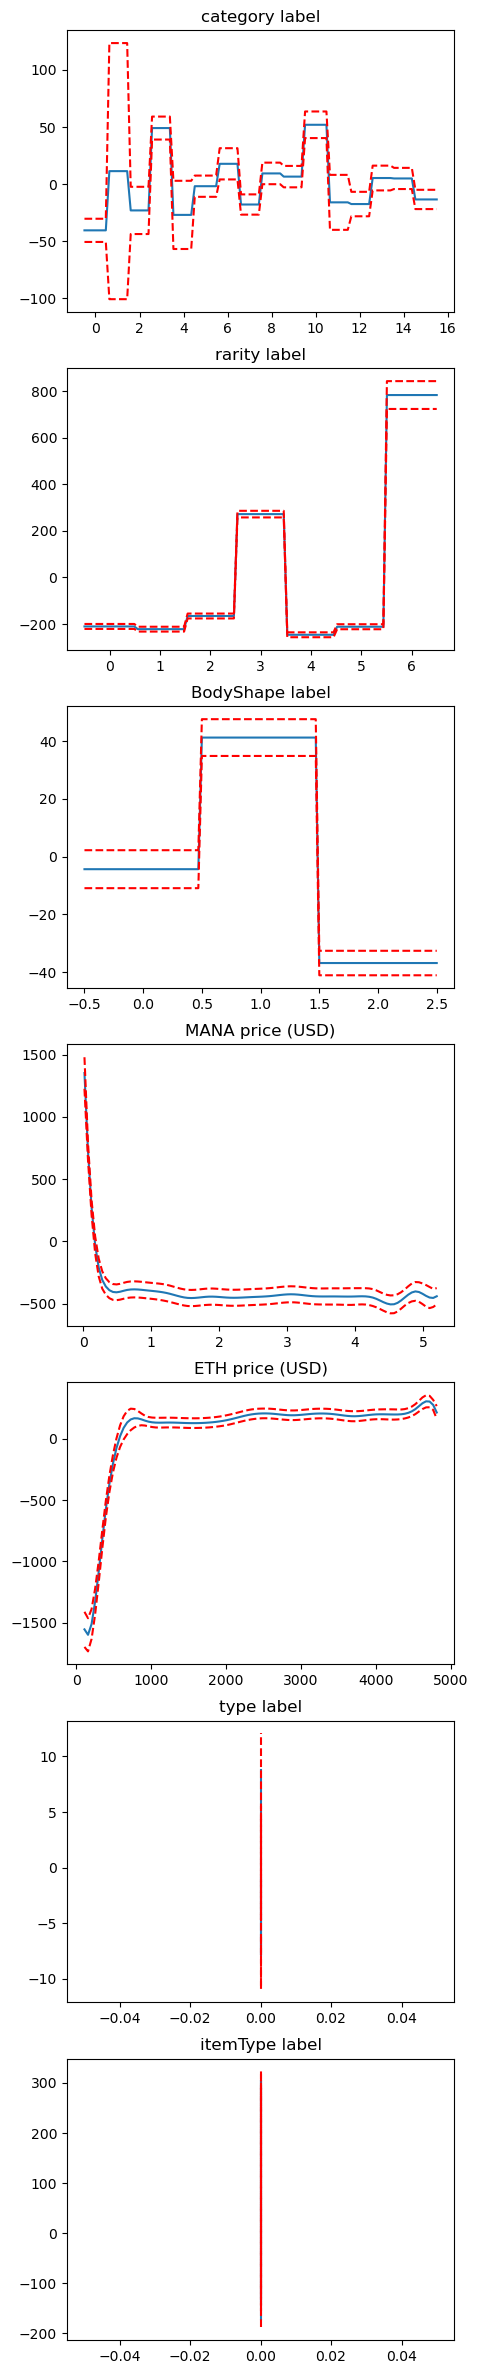

In [141]:
## plot marginal plots
plt.figure();
fig, axs = plt.subplots(7,1);
#fig.set_size_inches(10,50)
fig.set_size_inches(5,30)

titles = ['category label','rarity label', 'BodyShape label', 'MANA price (USD)', 'ETH price (USD)',
          'type label', 'itemType label']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    #if i == 0:
        #ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

In [75]:
X.shape[1]

8

In [76]:
#set y2 as response in USD
y2 = wear_data_train[['sale price (USD)']]

#fit a linearGAM to the data of X and y2
gam2 = LinearGAM().fit(X,y2)
#gam = LinearGAM()
gam2 = gam2.gridsearch(X, y2)

100% (11 of 11) |########################| Elapsed Time: 0:02:15 Time:  0:02:15


In [77]:
gam2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     84.9141
Link Function:                     IdentityLink Log Likelihood:                               -1520541.507
Number of Samples:                       134580 AIC:                                          3041254.8423
                                                AICc:                                         3041254.9533
                                                GCV:                                            32228.3967
                                                Scale:                                          32191.7963
                                                Pseudo R-Squared:                                   0.0964
Feature Function                  Lam

C:\Users\Bamar\AppData\Local\Temp\ipykernel_7572\263715579.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam2.summary()


<Figure size 640x480 with 0 Axes>

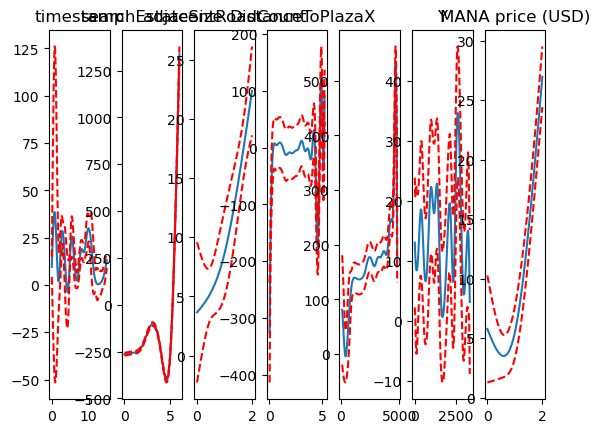

In [78]:
## plot the marginal plots
plt.figure();
fig, axs = plt.subplots(1,7);

titles = ['timestamp', 'searchEstateSize', 'adjacentRoadCount', 'DistanceToPlaza', 'X', 'Y', 'MANA price (USD)']
for i, ax in enumerate(axs):
    XX = gam2.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam2.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam2.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    #if i == 0:
        #ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

In [79]:
#create variables for X and y for test data for evaluation
X1_test = wear_data_test[['category label','rarity label', 'BodyShape label', 'MANA price (USD)', 'ETH price (USD)',
                     'collection label', 'type label', 'itemType label']]
y1_test = wear_data_test[['sale price (MANA)']]

In [81]:
#predict the sale prices on X1_test

Mana_predict = gam.predict(X1_test)
mana_predict = pd.DataFrame(Mana_predict)
print(y1_test)
print(mana_predict)


        sale price (MANA)
158730               5.00
162955               0.70
151850               8.00
116373               0.01
138884               0.30
...                   ...
151421               5.00
138127               1.00
188891               1.00
13399               50.00
81629                7.00

[57678 rows x 1 columns]
               0
0     -13.833903
1     -16.879992
2      18.453471
3     -45.838869
4     -10.530918
...          ...
57673 -44.261152
57674 -40.221449
57675  33.689125
57676  55.453125
57677  -3.078262

[57678 rows x 1 columns]


In [82]:
#create y2_test for USD response
y2_test = wear_data_test[['sale price (USD)']]

#predict the sale prices on X1_test
gam2_predict = gam2.predict(X1_test)


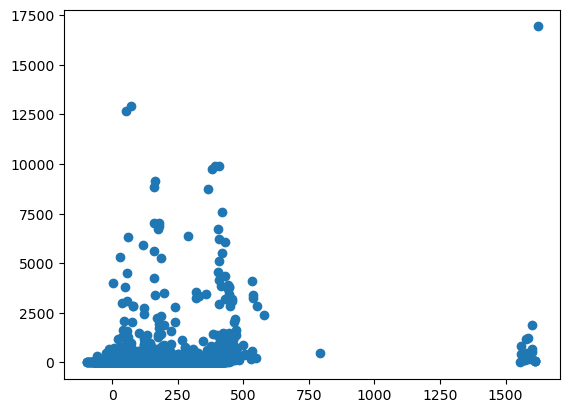

In [95]:
#scatterplot of prediction vs actual
plt.scatter(gam2_predict,y2_test)

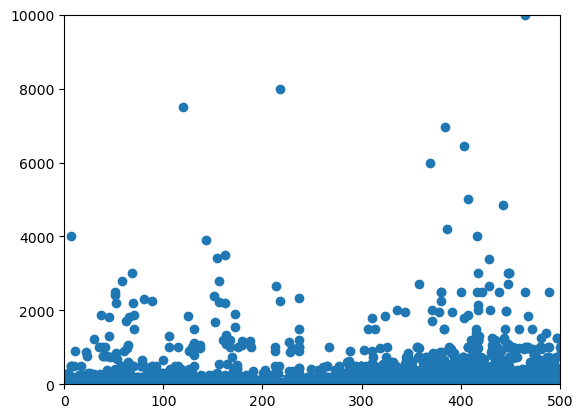

In [84]:
#scatter of predict vs actual for first gam
plt.scatter(Mana_predict,y1_test)
plt.xlim(0,500)
plt.ylim(0,10000)
#plt1.show()
plt.axline((0, 0), slope=1)

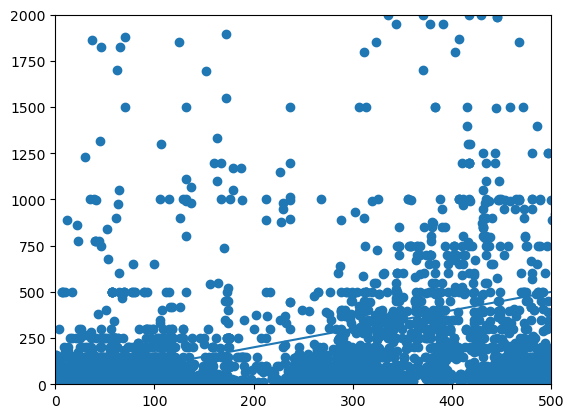

In [85]:
#same scatter with x limits and y limits
plt.scatter(Mana_predict,y1_test)
plt.xlim(0,500)
plt.ylim(0,2000)
#plt1.show()
plt.axline((0, 0), slope=1)

In [96]:
#reset indexs
y1_test_0 = y1_test.reset_index(drop=True)
y2_test_0 = y2_test.reset_index(drop=True)
X1_test_0 = X1_test.reset_index(drop=True)

In [148]:
def within_10percent(x):
    """This function checks if the prediction is within 10% on actual:
    ------------
    x: This function will be used in a df.apply and each row of the df will sent through
    this function
    return:
    -------
    1 if within 10%, 0 if not
    """
    if x['Prediction'] < 1.1*x['Actual'] and x['Prediction'] > 0.9*x['Actual']:
        return 1
    else:
        return 0
    

In [143]:
#create df for baseline results
print(wear_data_test.head())
Pred_rarity_0 = wear_data_test['Pred_rarity'].reset_index(drop=True)
base_results = pd.concat([y2_test_0,Pred_rarity_0],axis = 1)
base_results.rename(columns = {'Pred_rarity':'Prediction', 'sale price (USD)':'Actual'}, inplace = True)

#calculate if prediction is within 10% of actual
base_results['Within 10%'] = base_results.apply(within_10percent, axis = 1)
print(base_results['Within 10%'].sum()/base_results.shape[0])
base_results

        sale price (MANA)  sale price (USD)        Date    category  \
158730               5.00          3.516690  2022-10-06  lower_body   
162955               0.70          0.469452  2022-10-31     earring   
151850               8.00          6.669681  2022-08-25  upper_body   
116373               0.01          0.020152  2022-04-24        feet   
138884               0.30          0.263559  2022-06-30  upper_body   

           rarity BodyShape                                  collection  \
158730       epic         U  0x9463291f86dd02dbf7e7183754bd24adbecd8a54   
162955       epic         F  0x698c47ee122abcea31c251370c70e1feaf5545f2   
151850  legendary         U  0x81339a6e31ae03d3877ca248360c721c9d3b6712   
116373       rare         U  0xf67d1e4d53485b86dba9df1107167cdf905ba2ae   
138884   uncommon         U  0xd4d6e89c806124eab7c50577f17db56426d612f5   

        MANA price (USD)  ETH price (USD)   type     itemType  Network  \
158730          0.703338      1352.586524   mint

,Actual,Prediction,Within 10%
0,3.516690,12.791734,0
1,0.469452,12.791734,0
2,6.669681,48.602373,0
3,0.020152,11.420903,0
4,0.263559,3.825083,0
...,...,...,...
57673,4.162975,11.420903,0
57674,0.939703,12.791734,0
57675,0.578582,12.791734,0
57676,41.373201,11.420903,0


In [147]:
#create df for gam1 results
gam1_results = pd.concat([y1_test_0,pd.DataFrame(Mana_predict),X1_test_0['MANA price (USD)']], axis = 1)
gam1_results.rename(columns = {0:'Prediction', 'sale price (MANA)':'Actual'}, inplace = True)

#convert to USD to be able to directly compare different models
gam1_results['Actual (USD)'] = gam1_results['Actual']*gam1_results['MANA price (USD)']
gam1_results['Prediction (USD)'] = gam1_results['Prediction']*gam1_results['MANA price (USD)']
gam1_results

,Actual,Prediction,MANA price (USD),Actual (USD),Prediction (USD)
0,5.00,-13.833903,0.703338,3.516690,-9.729911
1,0.70,-16.879992,0.670646,0.469452,-11.320500
2,8.00,18.453471,0.833710,6.669681,15.384846
3,0.01,-45.838869,2.015167,0.020152,-92.372955
4,0.30,-10.530918,0.878529,0.263559,-9.251713
...,...,...,...,...,...
57673,5.00,-44.261152,0.832595,4.162975,-36.851613
57674,1.00,-40.221449,0.939703,0.939703,-37.796234
57675,1.00,33.689125,0.578582,0.578582,19.491907
57676,50.00,55.453125,0.827464,41.373201,45.885466


In [149]:
#check % within 10%
gam1_results['Within 10%'] = gam1_results.apply(within_10percent, axis = 1)
gam1_results['Within 10%'].sum()/gam1_results.shape[0]

0.009553035819549915

In [150]:
#create df for gam2 results
gam2_results = pd.concat([y2_test_0,pd.DataFrame(gam2_predict)], axis = 1)
gam2_results.rename(columns = {0:'Prediction', 'sale price (USD)':'Actual'}, inplace = True)

#check % within 10%
gam2_results['Within 10%'] = gam2_results.apply(within_10percent, axis = 1)
gam2_results['Within 10%'].sum()/gam2_results.shape[0]

0.017389645965532784

In [153]:
#Create random forest regressor for x and y
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor1.fit(X, y.to_numpy().ravel()) 

RandomForestRegressor(random_state=0)

In [154]:
#get variable importance

feature_list = list(X.columns)
# Get numerical feature importances
importances = list(regressor1.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: rarity label         Importance: 0.5
Variable: ETH price (USD)      Importance: 0.13
Variable: MANA price (USD)     Importance: 0.12
Variable: collection label     Importance: 0.1
Variable: category label       Importance: 0.07
Variable: itemType label       Importance: 0.05
Variable: BodyShape label      Importance: 0.02
Variable: type label           Importance: 0.01


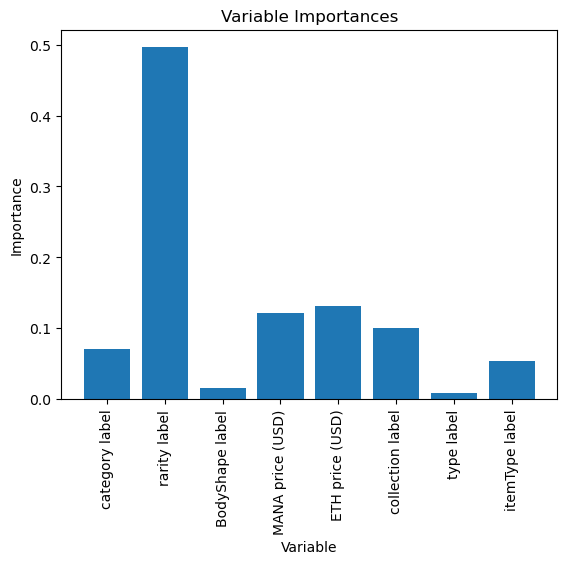

In [155]:
#plot variable importance

# Set the style
#plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [156]:
#make predictions with random forest 1
RF1_predict = regressor1.predict(X1_test)
RF1_predict

array([ 4.748     ,  1.56989048,  8.        , ...,  1.28780905,
       86.97096656,  2.7428    ])

In [157]:
#create df for rf1 results
RF1_results = pd.concat([y1_test_0,pd.DataFrame(RF1_predict)], axis = 1)
RF1_results = pd.concat([y1_test_0,pd.DataFrame(RF1_predict),X1_test_0['MANA price (USD)']], axis = 1)
RF1_results.rename(columns = {0:'Prediction', 'sale price (MANA)':'Actual'}, inplace = True)

#convert to USD so can directly compare to others
RF1_results['Actual (USD)'] = RF1_results['Actual']*RF1_results['MANA price (USD)']
RF1_results['Prediction (USD)'] = RF1_results['Prediction']*RF1_results['MANA price (USD)']

#calculate % within 10%
RF1_results['Within 10%'] = RF1_results.apply(within_10percent, axis = 1)
print(RF1_results['Within 10%'].sum()/RF1_results.shape[0])
RF1_results

0.5431880439682375


,Actual,Prediction,MANA price (USD),Actual (USD),Prediction (USD),Within 10%
0,5.00,4.748000,0.703338,3.516690,3.339449,1
1,0.70,1.569890,0.670646,0.469452,1.052841,0
2,8.00,8.000000,0.833710,6.669681,6.669681,1
3,0.01,0.010000,2.015167,0.020152,0.020152,1
4,0.30,4.453767,0.878529,0.263559,3.912762,0
...,...,...,...,...,...,...
57673,5.00,5.003300,0.832595,4.162975,4.165722,1
57674,1.00,1.855731,0.939703,0.939703,1.743837,0
57675,1.00,1.287809,0.578582,0.578582,0.745103,0
57676,50.00,86.970967,0.827464,41.373201,71.965346,0


In [159]:
#create rf 2 with response as usd
regressor2 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor2.fit(X, y2.to_numpy().ravel())

RandomForestRegressor(random_state=0)

In [160]:
#create df for rf2 results
RF2_predict = regressor2.predict(X1_test)
RF2_predict

array([ 3.32553737,  1.82486646,  6.66968083, ...,  0.57775362,
       71.9653457 ,  9.02052242])

In [161]:
#create df for rf2 results
RF2_results = pd.concat([y2_test_0,pd.DataFrame(RF2_predict)], axis = 1)
RF2_results.rename(columns = {0:'Prediction', 'sale price (USD)':'Actual'}, inplace = True)

#calculate % within 10%
RF2_results['Within 10%'] = RF2_results.apply(within_10percent, axis = 1)
RF2_results['Within 10%'].sum()/RF2_results.shape[0]

0.5357848746489129

In [162]:
# Get numerical feature importances
importances2 = list(regressor2.feature_importances_)
# List of tuples with variable and importance
feature_importances2 = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances2)]
# Sort the feature importances by most important first
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances2];

Variable: collection label     Importance: 0.4
Variable: rarity label         Importance: 0.19
Variable: ETH price (USD)      Importance: 0.15
Variable: MANA price (USD)     Importance: 0.13
Variable: type label           Importance: 0.07
Variable: category label       Importance: 0.04
Variable: itemType label       Importance: 0.01
Variable: BodyShape label      Importance: 0.0


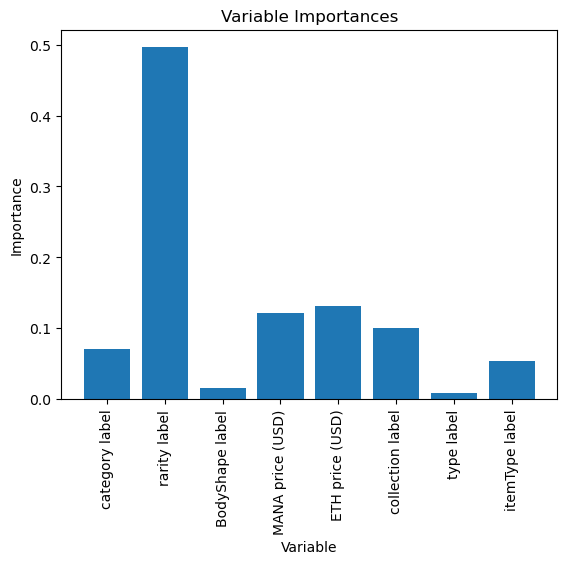

In [163]:
#plot variable importances

#plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); 
plt.title('Variable Importances');

In [164]:
#create df of both models variable importances to plot them on one chart
df1 = pd.DataFrame(feature_importances, columns = ['Variable', 'Importance'])
df1['model'] = 'Sale price in MANA'
#df1
df2 = pd.DataFrame(feature_importances2, columns = ['Variable', 'Importance'])
df2['model'] = 'Sale price in USD'
#df = pd.merge(df1,df2, on = 'Variable', how='left')
#df
df = pd.concat([df1,df2], ignore_index = True)
df

,Variable,Importance,model
0,rarity label,0.50,Sale price in MANA
1,ETH price (USD),0.13,Sale price in MANA
2,MANA price (USD),0.12,Sale price in MANA
3,collection label,0.10,Sale price in MANA
4,category label,0.07,Sale price in MANA
5,itemType label,0.05,Sale price in MANA
6,BodyShape label,0.02,Sale price in MANA
7,type label,0.01,Sale price in MANA
8,collection label,0.40,Sale price in USD
9,rarity label,0.19,Sale price in USD


Text(0.5, 1.0, 'Random Forest Regressor Variable Importance')

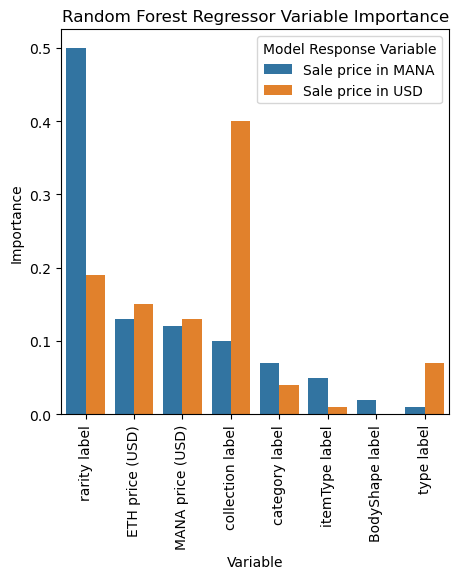

In [183]:
#plot both rf models variable importance

fig = plt.figure()
fig.set_size_inches(5,5)
sns.barplot(x="Variable", hue="model", y="Importance", data=df)
plt.legend(title='Model Response Variable')#, labels=['Sale price in MANA','Sale price in USD'])
plt.xticks(rotation=90)
plt.title('Random Forest Regressor Variable Importance')

In [167]:
#show rf1 results
RF1_results

,Actual,Prediction,MANA price (USD),Actual (USD),Prediction (USD),Within 10%
0,5.00,4.748000,0.703338,3.516690,3.339449,1
1,0.70,1.569890,0.670646,0.469452,1.052841,0
2,8.00,8.000000,0.833710,6.669681,6.669681,1
3,0.01,0.010000,2.015167,0.020152,0.020152,1
4,0.30,4.453767,0.878529,0.263559,3.912762,0
...,...,...,...,...,...,...
57673,5.00,5.003300,0.832595,4.162975,4.165722,1
57674,1.00,1.855731,0.939703,0.939703,1.743837,0
57675,1.00,1.287809,0.578582,0.578582,0.745103,0
57676,50.00,86.970967,0.827464,41.373201,71.965346,0


In [169]:
#calculate the absoulute error and percent error of all models

base_results['abs error'] = abs(base_results['Actual']-base_results['Prediction'])
base_results['Percent Error'] = base_results['abs error']/base_results['Actual']*100

gam1_results['abs error'] = abs(gam1_results['Actual']-gam1_results['Prediction'])
gam1_results['abs error (USD)'] = abs(gam1_results['Actual (USD)']-gam1_results['Prediction (USD)'])
gam1_results['Percent Error'] = gam1_results['abs error']/gam1_results['Actual']*100

gam2_results['abs error'] = abs(gam2_results['Actual']-gam2_results['Prediction']) 
gam2_results['Percent Error'] = gam2_results['abs error']/gam2_results['Actual']*100

RF1_results['abs error'] = abs(RF1_results['Actual']-RF1_results['Prediction']) 
RF1_results['abs error (USD)'] = abs(RF1_results['Actual (USD)']-RF1_results['Prediction (USD)'])
RF1_results['Percent Error'] = RF1_results['abs error']/RF1_results['Actual']*100

RF2_results['abs error'] = abs(RF2_results['Actual']-RF2_results['Prediction']) 
RF2_results['Percent Error'] = RF2_results['abs error']/RF2_results['Actual']*100

#calculate the mean absoluter error of all models to compare
print(base_results['abs error'].mean(), base_results['Percent Error'].mean())

print('\n', gam1_results['abs error'].mean(), gam1_results['Percent Error'].mean())
print(gam1_results['abs error (USD)'].mean(), gam1_results['Percent Error'].mean())
print(gam2_results['abs error'].mean(), gam2_results['Percent Error'].mean())

print('\n', RF1_results['abs error'].mean(), RF1_results['Percent Error'].mean())
print(RF1_results['abs error (USD)'].mean(), RF1_results['Percent Error'].mean())
print(RF2_results['abs error'].mean(), RF2_results['Percent Error'].mean())

#calculate the median absoluter error of all models to compare
print('\n', base_results['abs error'].median(), base_results['Percent Error'].median())

print('\n', gam1_results['abs error'].median(), gam1_results['Percent Error'].median())
print(gam1_results['abs error (USD)'].median(), gam1_results['Percent Error'].median())
print(gam2_results['abs error'].median(), gam2_results['Percent Error'].median())

print('\n', RF1_results['abs error'].median(), RF1_results['Percent Error'].median())
print(RF1_results['abs error (USD)'].median(), RF1_results['Percent Error'].median())
print(RF2_results['abs error'].median(), RF2_results['Percent Error'].median())

26.704644160634466 593155905235.6273

 57.05638836057623 1785201018936.4534
64.03360773642822 1785201018936.4534
31.343817238660648 224719690119.94742

 11.861742886116444 14862348160.700869
7.860363407778297 14862348160.700869
8.088985353590404 14862348146.882025

 10.989096319528215 526.3652401216227

 24.715329909082346 1569.0562905925117
31.182260499374664 1569.0562905925117
14.361516760401765 767.7040907388078

 0.10199999999999987 6.46666666666666
0.1147689427549506 6.46666666666666
0.12486283918276764 7.103750959227408


In [178]:
#create table of different evaluations metrics

columns = ['Model', 'Response Variable Units', 'Mean Absolute Error (USD)', 'Median Absolute Error (USD)',
           'Percent within 10% of Actual', "Percent within $1 of Actual"]
row0 = ['Baseline', 'USD', round(base_results['abs error'].mean(),2),
       round(base_results['abs error'].median(),2), round(base_results['Within 10%'].sum()/base_results.shape[0]*100,1),
       round(len(base_results[base_results['abs error']<1])/len(base_results['abs error'])*100,1)]
row1 = ['GAM Normal Distribution', 'MANA', round(gam1_results['abs error (USD)'].mean(),2),
       round(gam1_results['abs error (USD)'].median(),2), 
       round(gam1_results['Within 10%'].sum()/gam1_results.shape[0]*100,1),
       round(len(gam1_results[gam1_results['abs error (USD)']<1])/len(gam1_results['abs error (USD)'])*100,1)]
row2 = ['GAM Normal Distribution', 'USD', round(gam2_results['abs error'].mean(),2),
       round(gam2_results['abs error'].median(),2), 
       round(gam2_results['Within 10%'].sum()/gam2_results.shape[0]*100,1),
       round(len(gam2_results[gam2_results['abs error']<1])/len(gam2_results['abs error'])*100,1)]
row3 = ['RF', 'MANA', round(RF1_results['abs error (USD)'].mean(),2),
       round(RF1_results['abs error (USD)'].median(),2), 
       round(RF1_results['Within 10%'].sum()/RF1_results.shape[0]*100,1),
       round(len(RF1_results[RF1_results['abs error (USD)']<1])/len(RF1_results['abs error (USD)'])*100,1)]
row4 = ['RF', 'USD', round(RF2_results['abs error'].mean(),2),
       round(RF2_results['abs error'].median(),2), 
       round(RF2_results['Within 10%'].sum()/RF2_results.shape[0]*100,1),
       round(len(RF2_results[RF2_results['abs error']<1])/len(RF2_results['abs error'])*100,1)]


pd.DataFrame([row0,row1,row2,row3,row4], columns = columns)

,Model,Response Variable Units,Mean Absolute Error (USD),Median Absolute Error (USD),Percent within 10% of Actual,Percent within $1 of Actual
0,Baseline,USD,26.70,10.99,2.2,6.1
1,GAM Normal Distribution,MANA,64.03,31.18,1.0,1.4
2,GAM Normal Distribution,USD,31.34,14.36,1.7,6.6
3,RF,MANA,7.86,0.11,54.3,70.5
4,RF,USD,8.09,0.12,53.6,69.9


In [99]:
#checking the percent decrease of rf1 versus baseline
(RF1_results['abs error (USD)'].mean()-base_results['abs error'].mean())/base_results['abs error'].mean()

-0.7355584707147255

In [142]:
#check mean and mdeian sale prices of the test data
print(np.mean(wear_data_test['sale price (MANA)']))
print(np.median(wear_data_test['sale price (MANA)']))
print(np.mean(wear_data_test['sale price (USD)']))
np.median(wear_data_test['sale price (USD)'])

29.90716437997125
1.0
19.026478505670354


2.0787229520536297